# This notebook was made with the idea of studying the data of the sinking of the Titanic, to visualize relationships between survival rate and other factors, such as age, gender and class.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -O titanic.csv


--2025-05-23 20:24:41--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.009s  

2025-05-23 20:24:42 (6.28 MB/s) - ‘titanic.csv’ saved [60302/60302]



Visualizing the dataset columns

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visualizing null data in the dataset, filling Age with median, dropping missing cabin data and filling embarked with the most common value.

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.drop(columns=['Cabin'])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Survived percentages (0 is not Survived, 1 is Survived)

---


Classes mean survival percentage

---


Sex mean survival percentage


In [ ]:
print(df['Survived'].value_counts(normalize=True) * 100)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [ ]:
print(df.groupby('Pclass')['Survived'].mean() * 100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [ ]:
print(df.groupby("Sex")["Survived"].mean() * 100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


Visualizing the relationship between Survival and Class, we can clearly see that
1st class passengers survived the most (62.9% of 1st class passengers), followed by 2nd class passengers (47.2%), and the 3rd class passengers surviving the least (24.2%).

In [ ]:

plt.rcParams['figure.dpi'] = 100
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6.75))

plt.title('Relationship between Survival and Class', size=18)

plt.xticks(size=14)
plt.yticks(size=14)

sns.barplot(x='Pclass', y='Survived', data=df, hue='Pclass', palette=['#eb3434', '#eb7a34', '#ebae34'], legend=False)

plt.ylabel('Survived', size=18)
plt.xlabel('Class', size=18)

sns.despine(left=True);

NameError: name 'plt' is not defined

Here we can clearly see, with the relationship between Survival and Sex, that females survived the most, approximately 74.2% of the female passengers survived, while only 18.8% of men survived.

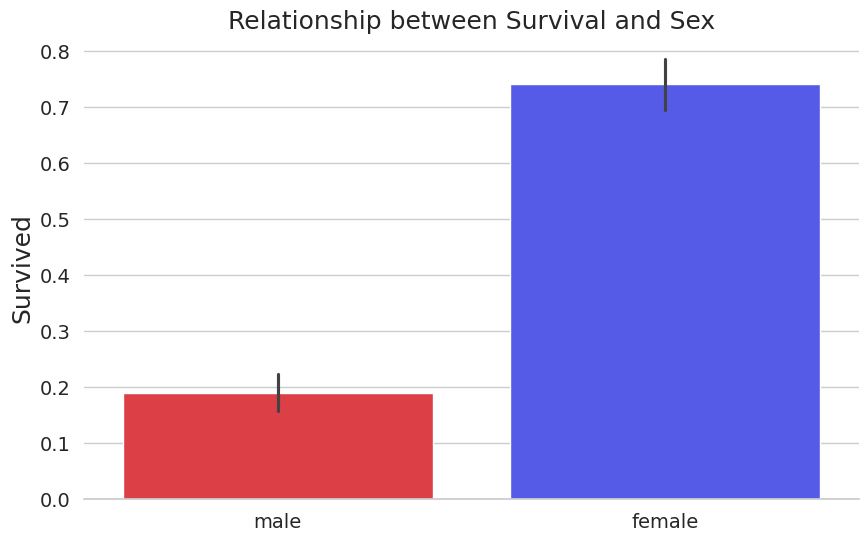

In [ ]:

plt.figure(figsize=(10, 6))

plt.title('Relationship between Survival and Sex', size=18)

plt.xticks(size=14)
plt.yticks(size=14)
sns.barplot(x='Sex', y='Survived', data=df, hue = 'Sex', palette=['#f72530', '#3d44ff'])

plt.ylabel('Survived', size=18)
plt.xlabel('')
sns.despine(left=True);

Here, we can visualize the Count of Titanic passangers that survived and didn't survive. It's possible to see that passengers with the highest fare were able to survive more compared to passengers with lower fares.

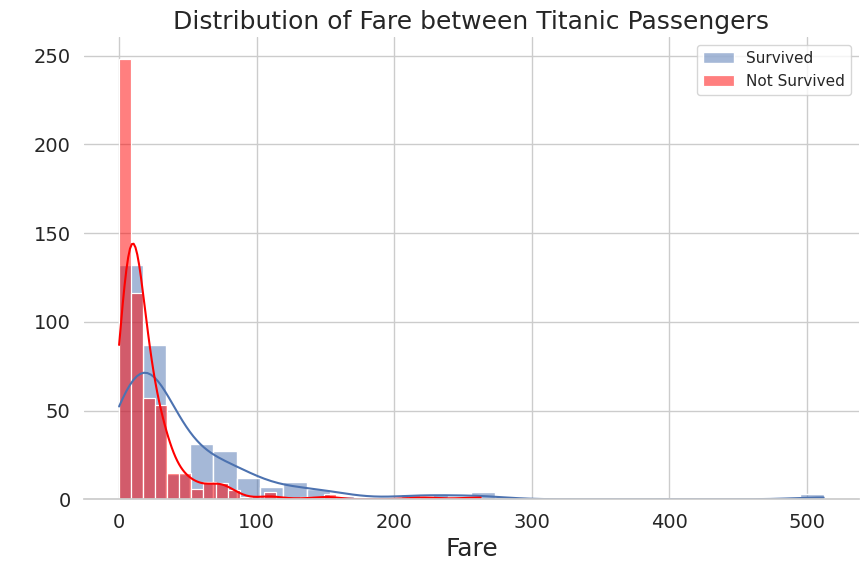

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Distribution of Fare between Titanic Passengers', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

plt.ylabel(' ')
plt.xlabel('Fare', size=18)

sns.histplot(df[df["Survived"] == 1]["Fare"], bins=30, kde=True, label="Survived")
sns.histplot(df[df["Survived"] == 0]["Fare"], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()

sns.despine(left=True)
plt.show();

Here, we can visualize the Count of Age between Titanic passangers that survived and didn't survive. It's possible to see that children (below age 10) survived more compared to other ages, while people with age 30 being the ones that died the most.

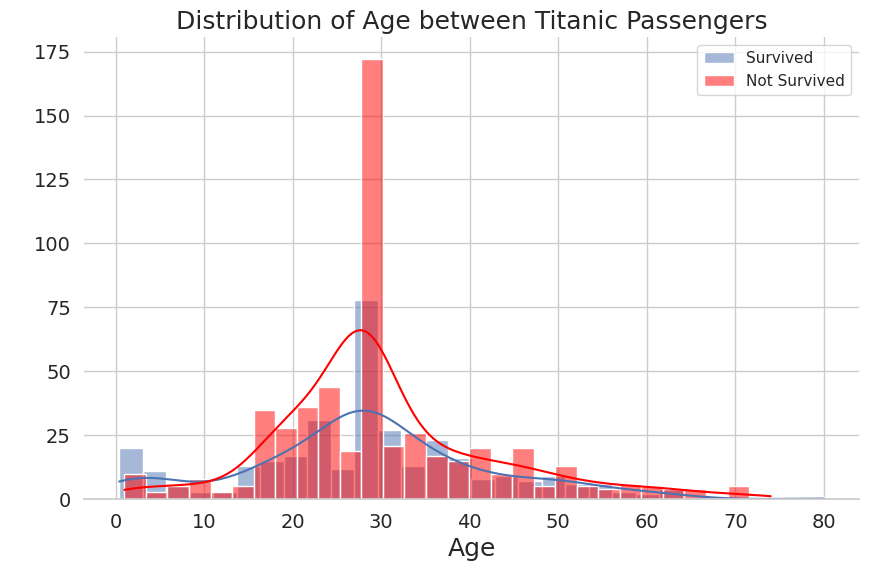

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Distribution of Age between Titanic Passengers', size=18)

plt.xticks(size=14)
plt.yticks(size=14)

plt.ylabel(' ')
plt.xlabel('Age', size=18)

sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, kde=True, label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()

sns.despine(left=True)
plt.show();